### 1. Import Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### 2. Load Data

In [2]:
#Load Data
data = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 3. Basic Data Exploration

In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
#Percentage of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64


* Good the Dataset does not contain any missing data!

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Some Points To Note From the DataSet:

1. **Age**: Advanced age can increase the risk of heart failure due to the natural wear and tear on the heart muscles over time.

2. **Anaemia**: Low red blood cell count may lead to reduced oxygen delivery to the heart, potentially causing heart failure.

3. **Creatinine Phosphokinase**: Elevated levels may indicate heart muscle damage, which could contribute to heart failure.

4. **Diabetes**: Poorly managed diabetes can damage blood vessels and nerves, increasing the likelihood of heart failure.

5. **Ejection Fraction**: A low ejection fraction (the amount of blood pumped out of the heart) may signal heart muscle weakness.

6. **High Blood Pressure**: Prolonged high blood pressure can strain the heart and increase the risk of heart failure.

7. **Platelets**: Abnormal platelet levels may lead to blood clots, which can cause heart problems, including heart failure.

8. **Serum Creatinine**: High levels may suggest impaired kidney function, affecting fluid balance and potentially leading to heart failure.

9. **Serum Sodium**: Abnormal levels can disrupt fluid balance and influence heart function, contributing to heart failure.

10. **Sex**: Gender differences can impact heart disease risk, with males having a higher risk of heart failure.

11. **Smoking**: Tobacco use damages blood vessels and increases the risk of heart failure.

12. **Time**: The duration of exposure to risk factors and the progression of underlying conditions can influence heart failure risk.

### 4. Exploratory Data Analysis

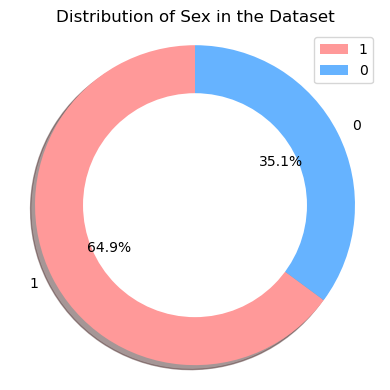

In [6]:

import pandas as pd
import matplotlib.pyplot as plt


# Group the data by 'sex' and count the occurrences of each category
sex_counts = data['sex'].value_counts()

# Create a custom color palette for the pie chart slices
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a central circle to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend
plt.title("Distribution of Sex in the Dataset")
plt.legend(labels=sex_counts.index, loc='upper right')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()




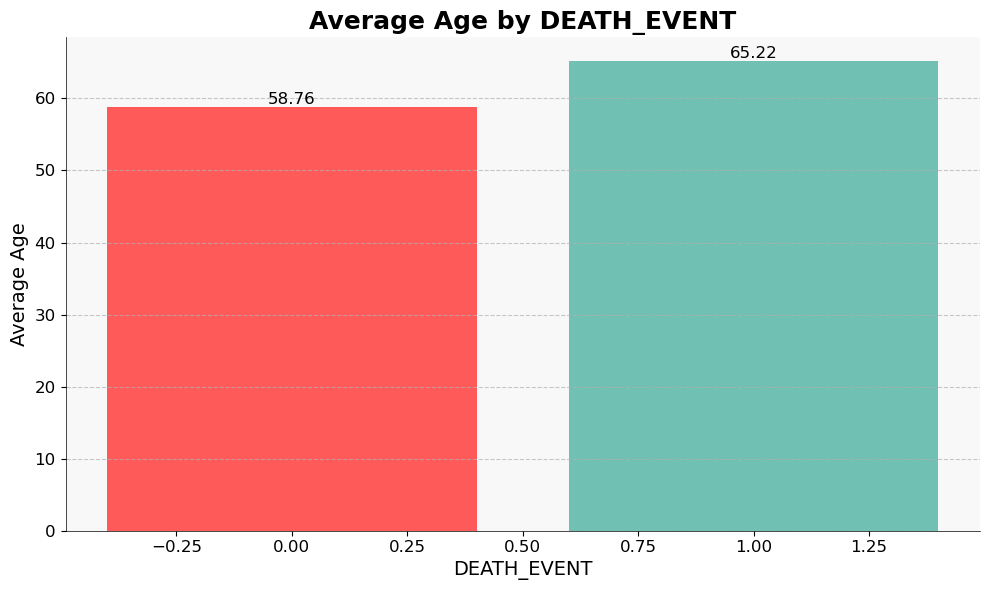

In [7]:
age_by_death_event = data.groupby('DEATH_EVENT')['age'].mean()


colors = ['#FF5A5A', '#70C1B3']


plt.figure(figsize=(10, 6))
ax = plt.bar(age_by_death_event.index, age_by_death_event, color=colors)


for i, bar in enumerate(ax):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{age_by_death_event[i]:.2f}', ha='center', va='bottom', fontsize=12)


plt.title('Average Age by DEATH_EVENT', fontsize=18, fontweight='bold')
plt.xlabel('DEATH_EVENT', fontsize=14)
plt.ylabel('Average Age', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()


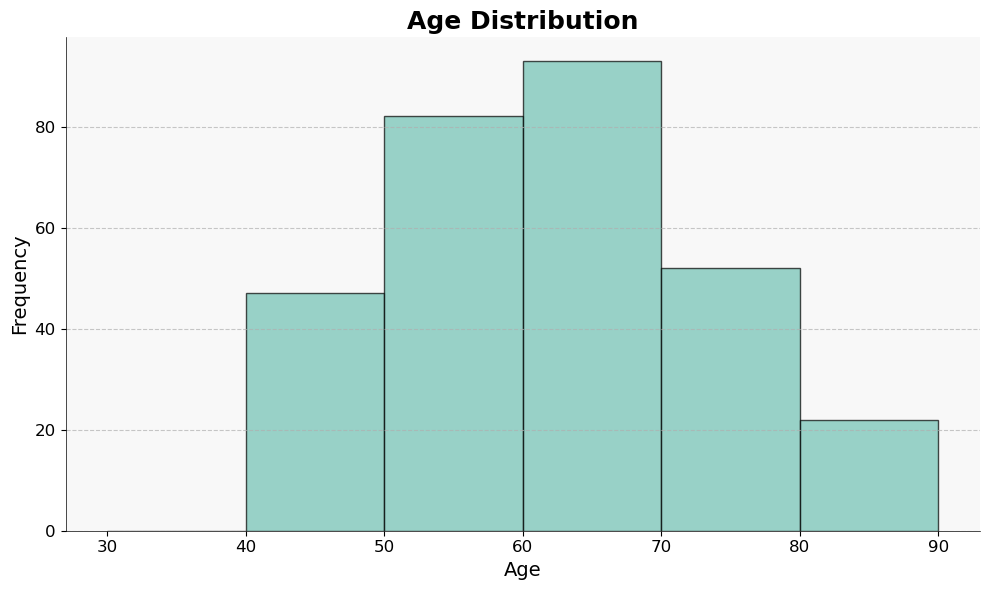

In [8]:
age_data = data['age']


plt.figure(figsize=(10, 6))


bins = [30, 40, 50, 60, 70, 80, 90]


plt.hist(age_data, bins=bins, edgecolor='black', color='#70C1B3', alpha=0.7)

plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


# Remove unnecessary spines and set the layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()


### 5. Data Processing

In [9]:
from sklearn.feature_selection import SelectKBest, chi2



# Split the data into features (X) and target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Create a SelectKBest object with chi2 scoring function (k is the number of features to select)
k_best = SelectKBest(score_func=chi2, k=5)

# Fit the SelectKBest object on the data and transform it to get the selected features
X_k_best = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Selected Features:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'time'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=1)

### 6. Modelling

In [11]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Support Vector Machine Classifier
my_model = LogisticRegression()

In [12]:
my_model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
my_model.score(X_test, y_test)

0.8666666666666667